# Impact of SEC the decision on Bitcoin transactions network

The US financial markets watchdog, the SEC, gave the go-ahead on Wednesday for the listing of a new bitcoin investment product, a decision seen as a major step towards the adoption of cryptocurrencies, which could shake up the sector.
The aim of our work is to analyze the impact of the Security Exchange Comission's 10/10/2024 announcements (SEC decision) on bitcoin transactions.

The SEC, the US financial markets watchdog, has given the go-ahead for the listing of an ETF (exchange traded fund), an index fund that enables investors to profit from bitcoin's developments without investing their money directly in the digital currency. In concrete terms, investors buy shares in the fund, which they can sell at any time, rather than bitcoin. The fund's assets are invested in cryptocurrencies.

The market had already reached a milestone, in October 2021, with the listing of the first ETF invested not directly in bitcoin but in futures contracts linked to the cryptocurrency. Until now, access to digital currencies required opening an account on a cryptocurrency exchange platform and converting a traditional currency (issued by a central bank), such as the dollar.

By accepting the application of 11 investment companies, including BlackRock, the SEC has authorised a new bitcoin investment product. This is a major step forward for the adoption of cryptocurrencies, which could revolutionise the industry. This approval could "attract a significant amount of capital to the sector and is expected to have a potentially massive impact on valuations across the entire cryptocurrency sector", Swissquote analyst Ipek Ozkardeskaya.

Many investors had anticipated this authorisation. Over the last twelve months, the price of the leading cryptocurrency by capitalisation has soared by more than 150%. Bitcoin is now worth more than 45,000 dollars. In an uncertain geopolitical climate, some investors are also tending to turn to cryptoassets - which are reputed to be volatile - as a safe haven, BlackRock CEO Larry Fink recently said.

### Import libs

In [ ]:
#!pip install nxviz

In [ ]:
import os
import pandas as pd
import numpy as np

### Ondine path ###
# path = os.chdir('/Users/ondineji/Library/Mobile Documents/com~apple~CloudDocs/Documents/ACADEMIQUE/M2 FTD/S2/Network Analysis in Python /projet/data/')

### Hugo path ###
path = os.chdir('C:/Users/humic/OneDrive/Documents/Ecole/SorbonneFTD/Cours/Data_Mining_Network/project/data/')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# import data viz libs
import matplotlib.pyplot as plt
from matplotlib import cm

# Import graph libs
import networkx as nx
from nxviz import CircosPlot, ArcPlot
from cdlib import algorithms

# import custom functions

from utils import *

# PART I : Exploratory Data Analysis (EDA)

## /!\ DO NOT RUN THE FOLLOWING UNTIL THE OPPOSITE INSTRUCTION /!\

### Bitcoin stock price Analysis

In [ ]:
import yfinance as yf

def get_bitcoin_stock_prices(start_date, end_date):
    """
    Retrieves daily Bitcoin stock prices for the specified date range.
    
    Parameters:
        start_date (str): Start date in the format 'YYYY-MM-DD'.
        end_date (str): End date in the format 'YYYY-MM-DD'.
        
    Returns:
        DataFrame: DataFrame containing daily Bitcoin stock prices for the specified date range.
    """
    # Define the ticker symbol for Bitcoin (BTC-USD)
    ticker_symbol = 'BTC-USD'
    
    # Create ticker object
    ticker = yf.Ticker(ticker_symbol)
    
    # Get historical data for the specified date range
    historical_data = ticker.history(start=start_date, end=end_date)
    
    return historical_data

# Example usage
start_date = '2024-01-01'
end_date = '2024-01-10'
bitcoin_prices_df = get_bitcoin_stock_prices(start_date, end_date)
bitcoin_prices_df

## Import Data

### Import block

| Column               | Description                                                                                  |
|----------------------|----------------------------------------------------------------------------------------------|
| id                   | Unique identifier for each block record.                                                    |
| transaction_hash     | Hash of the block's transaction.                                                             |
| time                 | Timestamp indicating when the block was mined, in Unix epoch format.                         |
| median_time          | Median timestamp of the block.                                                               |
| size                 | Size of the block in bytes.                                                                  |
| stripped_size        | Size of the block after removing witness data (for Segregated Witness transactions).         |
| weight               | The weight of the block (considering transaction size and witness data), used in Segregated Witness. |
| version              | The version of the block.                                                                    |
| version_hex          | Hexadecimal representation of the block version.                                              |
| version_bits         | Version bits for signaling soft forks.                                                       |
| merkle_root          | Root of the Merkle tree of all transactions in the block.                                     |
| nonce                | A random value that miners increment to find a valid proof-of-work.                           |
| bits                 | Target threshold for the proof-of-work hash.                                                 |
| difficulty           | Difficulty of finding a valid block hash.                                                    |
| chainwork            | Cumulative work done to build the blockchain.                                                |
| coinbase_data_hex    | Hexadecimal representation of the coinbase transaction data.                                  |
| transaction_count    | Total number of transactions in the block.                                                   |
| witness_count        | Number of witness transactions (for Segregated Witness).                                      |
| input_count          | Total number of inputs in all transactions.                                                  |
| output_count         | Total number of outputs in all transactions.                                                 |
| input_total          | Total value of all inputs in the block (in bitcoin).                                         |
| input_total_usd      | Total value of all inputs in the block (in USD).                                             |
| output_total         | Total value of all outputs in the block (in bitcoin).                                        |
| output_total_usd     | Total value of all outputs in the block (in USD).                                            |
| fee_total            | Total transaction fees collected by miners for all transactions in the block (in bitcoin). |
| fee_total_usd        | Total transaction fees collected by miners for all transactions in the block (in USD).     |
| fee_per_kb           | Average transaction fee per kilobyte of the block.                                           |
| fee_per_kb_usd       | Average transaction fee per kilobyte of the block (in USD).                                   |
| fee_per_kwu          | Average transaction fee per kiloweight unit (Segregated Witness weight unit) of the block.   |
| fee_per_kwu_usd      | Average transaction fee per kiloweight unit of the block (in USD).                           |
| cdd_total            | Cumulative Days Destroyed (a measure of how much existing coin supply is transacted).         |
| generation           | Reward generated by the coinbase transaction (in bitcoin).                                    |
| generation_usd       | Reward generated by the coinbase transaction (in USD).                                        |
| reward               | Total reward for miners (including transaction fees) for mining the block (in bitcoin).      |
| reward_usd           | Total reward for miners (including transaction fees) for mining the block (in USD).          |
| guessed_miner        | Estimation or guess of the mining pool or entity that mined the block based on analysis or heuristics. |

In [ ]:
tsv_block = "dump_bitcoin_10_01_2024/blockchair_bitcoin_blocks_20240110.tsv"

# Read the TSV file into a pandas DataFrame
df_blocks = pd.read_csv(tsv_block, sep='\t')
df_blocks = df_blocks.rename(columns={'hash': 'transaction_hash'})

# Display the DataFrame
print("#### Block dimension ####")
print(df_blocks.shape)

print("\n#### Block attributes ####")
print(df_blocks.columns.tolist())

df_blocks

### Import transactions

| Column             | Description                                                                     |
|--------------------|---------------------------------------------------------------------------------|
| block_id           | Identifier of the block in which the transaction is included.                   |
| transaction_hash   | Unique hash identifier of the transaction.                                      |
| time               | Timestamp of when the transaction was recorded in the blockchain.               |
| size               | Size of the transaction in bytes.                                               |
| weight             | Weight of the transaction, accounting for witness data in SegWit transactions.   |
| version            | Version number of the transaction format.                                       |
| lock_time          | The earliest time or block height when a transaction can be added to the blockchain. |
| is_coinbase        | Binary indicator (True/False) for coinbase transactions.                         |
| has_witness        | Binary indicator (True/False) if the transaction includes witness data (SegWit). |
| input_count        | Number of inputs (UTXOs) in the transaction.                                    |
| output_count       | Number of outputs (destination addresses) in the transaction.                    |
| input_total        | Total value of the inputs in satoshis.                                          |
| input_total_usd    | Total value of the inputs in USD.                                               |
| output_total       | Total value of the outputs in satoshis.                                         |
| output_total_usd   | Total value of the outputs in USD.                                              |
| fee                | Transaction fee paid by the sender in satoshis.                                 |
| fee_usd            | Transaction fee paid by the sender in USD.                                      |
| fee_per_kb         | Transaction fee rate per kilobyte of transaction size.                          |
| fee_per_kb_usd     | Transaction fee rate per kilobyte in USD.                                       |
| fee_per_kwu        | Transaction fee rate per kiloweight unit (kwu).                                |
| fee_per_kwu_usd    | Transaction fee rate per kiloweight unit in USD.                               |
| cdd_total          | Cumulative Daily Difficulty (CDD) total. A measure related to historical network difficulty. |


In [ ]:
tsv_transactions = "dump_bitcoin_10_01_2024/blockchair_bitcoin_transactions_20240110.tsv"

# Read the TSV file into a pandas DataFrame
df_transactions = pd.read_csv(tsv_transactions, sep='\t')
df_transactions = df_transactions.rename(columns={'hash': 'transaction_hash'})

# Display the DataFrame
print("#### Transaction dimension ####")
print(df_transactions.shape)

print("\n#### Transaction attributes ####")
print(df_transactions.columns.tolist())

df_transactions

### Import adresses

| Column   | Description                                       |
|----------|---------------------------------------------------|
| address  | Bitcoin address, a unique identifier on the blockchain. |
| balance  | The balance of Bitcoin associated with the address, measured in satoshis. |

In [ ]:
tsv_adresses = "dump_bitcoin_10_01_2024/blockchair_bitcoin_addresses_latest.tsv"

# Read the TSV file into a pandas DataFrame
df_adresses = pd.read_csv(tsv_adresses, sep='\t')
df_adresses = df_adresses.rename(columns={'address': 'hash_address'})

# Display the DataFrame
print("#### Adresses dimension ####")
print(df_adresses.shape)

print("\n#### Adresses attributes ####")
print(df_adresses.columns.tolist())

df_adresses

### Import adresses with entity

In [ ]:
csv_entity = "dump_bitcoin_10_01_2024/addresses_2016.csv"

# Read the TSV file into a pandas DataFrame
df_entity = pd.read_csv(csv_entity) 
df_entity = df_entity.rename(columns={'address': 'hash_address'})

In [ ]:
df_entity

### Import inputs

| Column                       | Description                                                                  |
|------------------------------|------------------------------------------------------------------------------|
| block_id                     | Identifier of the block in which the transaction is included.                |
| transaction_hash             | Unique hash identifier of the transaction.                                   |
| index                        | Index of the input in the transaction.                                       |
| time                         | Timestamp of when the input transaction was recorded in the blockchain.      |
| value                        | Monetary value of the input in satoshis.                                     |
| value_usd                    | Monetary value of the input in USD.                                          |
| recipient                    | Address number of the input recipient.                                       |
| type                         | Type of the address (e.g., pubkey, pubkeyhash, scripthash, multisig).        |
| script_hex                   | Hexadecimal representation of the input script.                               |
| is_from_coinbase             | Binary indicator (True/False) if the input is from a coinbase transaction.   |
| is_spendable                 | Binary indicator (True/False) if the input is spendable.                      |
| spending_block_id            | Identifier of the block where the input is spent.                             |
| spending_transaction_hash    | Unique hash identifier of the spending transaction.                           |
| spending_index               | Index of the spent output in the spending transaction.                        |
| spending_time                | Timestamp of when the spending transaction was recorded.                     |
| spending_value_usd           | Monetary value of the spending input in USD.                                  |
| spending_sequence            | Sequence number of the spending transaction.                                  |
| spending_signature_hex       | Hexadecimal representation of the spending input signature.                   |
| spending_witness             | Binary indicator (True/False) if the spending transaction uses a witness.    |
| lifespan                     | Time difference (in seconds) between the spending and input transactions.    |
| cdd                          | Cumulative Daily Difficulty (CDD) of the input transaction.                   |


In [ ]:
tsv_inputs = "dump_bitcoin_10_01_2024/blockchair_bitcoin_inputs_20240110.tsv"

# Read the TSV file into a pandas DataFrame
df_inputs = pd.read_csv(tsv_inputs, sep='\t')
df_inputs = df_inputs.rename(columns={'recipient': 'hash_address'})

# Display the DataFrame
print("#### Intputs dimension ####")
print(df_inputs.shape)

print("\n#### Intputs attributes ####")
print(df_inputs.columns.tolist())

df_inputs = df_inputs.drop_duplicates(subset='transaction_hash', keep='first')

df_inputs

### Import outputs

| Column             | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| block_id           | Identifier of the block in which the transaction is included.               |
| transaction_hash   | Unique hash identifier of the transaction.                                  |
| index              | Index of the output in the transaction.                                     |
| time               | Timestamp of when the output transaction was recorded in the blockchain.    |
| value              | Monetary value of the output in satoshis.                                   |
| value_usd          | Monetary value of the output in USD.                                        |
| recipient          | Address number of the output recipient.                                     |
| type               | Type of the address (e.g., pubkey, pubkeyhash, scripthash, multisig).       |
| script_hex         | Hexadecimal representation of the output script.                            |
| is_from_coinbase   | Binary indicator (True/False) if the output is from a coinbase transaction. |
| is_spendable       | Binary indicator (True/False) if the output is spendable.                   |


In [ ]:
tsv_outputs = "dump_bitcoin_10_01_2024/blockchair_bitcoin_outputs_20240110.tsv"

# Read the TSV file into a pandas DataFrame
df_outputs = pd.read_csv(tsv_outputs, sep='\t')
df_outputs = df_outputs.rename(columns={'hash': 'transaction_hash', 'recipient': 'hash_address'})

# Display the DataFrame
print("#### Outputs dimension ####")
print(df_outputs.shape)

print("\n#### Outputs attributes ####")
print(df_outputs.columns.tolist())

df_outputs = df_outputs.drop_duplicates(subset='transaction_hash', keep='first')

df_outputs

### Filter out columns

In [ ]:
df_transactions = df_transactions[["transaction_hash", "time", "size", "weight", "input_count", "output_count",
                                  "input_total", "input_total_usd", "output_total", "output_total_usd", "fee",
                                  "fee_usd", "is_coinbase"]]

df_entity = df_entity[["address_num", "address_type", "hash_address", "entity_name", "entity_type"]]

df_inputs = df_inputs[["transaction_hash", "index", "hash_address",  "value", "value_usd", "time", "spending_transaction_hash", "spending_time", "spending_value_usd"]]
df_inputs = df_inputs.rename(columns={
    'index': 'index_input',
    'hash_address': 'hash_address_input',
    'value': 'value_input',
    'value_usd': 'value_usd_input',
    'time': 'time_input'
})


df_outputs = df_outputs[["transaction_hash", "index", "hash_address", "value", "value_usd", "time"]]
df_outputs = df_outputs.rename(columns={
    'index': 'index_output',
    'hash_address': 'hash_address_output',
    'value': 'value_output',
    'value_usd': 'value_usd_output',
    'time': 'time_output'
})

#### Merge inputs and outputs based on the hash of the transaction

In [ ]:
edges = pd.merge(df_inputs, df_outputs, on='transaction_hash', how='inner')

In [ ]:
print("=== Columns ===")
print(edges.columns)

print("\n\n=== Dimensions ===")
print(edges.shape)

print("\n\n=== Sample ===")
edges.head()

In [ ]:
edges = edges[edges['hash_address_input'] == edges['hash_address_output']]
edges = edges[['transaction_hash', 'spending_transaction_hash', 'time_input', 'time_output', 
                   'hash_address_input', 'hash_address_output', 
                   'value_input', 'value_output', 'value_usd_input', 'value_usd_output']]
edges

# PART II : MODELLING

## /!\ RUN THE NOTEBOOK FROM HERE

In [2]:
import os
import pandas as pd
import numpy as np

### Ondine path ###
# path = os.chdir('/Users/ondineji/Library/Mobile Documents/com~apple~CloudDocs/Documents/ACADEMIQUE/M2 FTD/S2/Network Analysis in Python /projet/data/')

### Hugo path ###
path = os.chdir('C:/Users/humic/OneDrive/Documents/Ecole/SorbonneFTD/Cours/Data_Mining_Network/project/data/')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# import data viz libs
import matplotlib.pyplot as plt
from matplotlib import cm

# Import graph libs
import networkx as nx
from nxviz import CircosPlot, ArcPlot
from cdlib import algorithms

# import custom functions

from utils import *

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'wurlitzer', 'infomap', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


## Build the transaction network for the SEC announcement on ETF bicoin

#### Build edges

Edge = an input / an output (attributes: address/entity, amount)

In [3]:
edges_df = pd.read_csv("edges.csv")
edges_df = edges_df[['transaction_hash', 'spending_transaction_hash', 'time_input', 'hash_address_input', 'value_input', 'value_usd_input']]
edges_df

transaction_hash  \
0       19164e615c48161141ff5c750c08c6a21202446b16720a...   
1       93f96b0e895bce583c0762d714e5d6cfb0eb2df5f4c8e7...   
2       b3b8d806902bbbb45371a16344c004c77a3d09f280f92d...   
3       6e2d986e8a97c21b51e5f5c8d03a6e35c5d575aff5e8cc...   
4       f35ad09853a3707e9146fc30eb049142f8b66fd677bf97...   
...                                                   ...   
105527  342750fe8b5fd681d07103f377528b1528415c467b6a3a...   
105528  806a43c458e6c6fb407452fcce180091ad1daa80237760...   
105529  35b2fd56400a31ef30263e39083c5dc387addb20ff42c7...   
105530  68da72d8daaef9541adfd4a212cd72ecaee6a541c90f39...   
105531  b9f0148dd7f89ce61d3012b1e3debbd743daed52af19c5...   

                                spending_transaction_hash  \
0       b3b8d806902bbbb45371a16344c004c77a3d09f280f92d...   
1       7525607e5547dafaf647d8a0f4073ba873c0b3e614cf77...   
2       2a3b7681cc8e2828f6d167f94784c16a01d063e32aae64...   
3       f35ad09853a3707e9146fc30eb049142f8b66fd677bf97...   
4       1a7622dab7b996900b4ba60dd598aa29d75dcfd244924b...   
...                                                   ...   
105527  26d078c6cc1cb51e207663c4f6fa0ec45c3f3a1a7228a8...   
105528  6f6fb148dad5038fdd8a03dd35b45fd13aa1ca5f93a378...   
105529  83d2ff592f8f7064185cdd7168c63e6fb89bb3d9ab97bd...   
105530  8ea76e6b6ac29c91c9947f737a92d84c34e6e80dd3f091...   
105531  f8fea9b38b16f76e6ac5a5ecb50a6cd4911689d4a4b0b4...   

                 time_input  \
0       2024-01-10 00:35:31   
1       2024-01-10 00:35:31   
2       2024-01-10 00:35:31   
3       2024-01-10 00:35:31   
4       2024-01-10 00:35:31   
...                     ...   
105527  2024-01-10 23:51:21   
105528  2024-01-10 23:51:21   
105529  2024-01-10 23:34:19   
105530  2024-01-10 23:03:46   
105531  2024-01-10 23:51:21   

                                       hash_address_input  value_input  \
0       bc1pu9uysdxzq99fzat8myautah7qnahec64dm3smpc95l...        47076   
1                      14dJRoKyj2i83uRbTUeKqhFMwvFZcpiXyn    768666170   
2              bc1qwfn4fq5l86snpddxa7wy9jh6dc86vd6jdquw2g          546   
3       bc1pk8fr0lkcfp7csz04hqn4alqy332h0nksmqmjjg9hye...        42786   
4                      1GrwDkr33gT6LuumniYjKEGjTLhsL5kmqC          546   
...                                                   ...          ...   
105527  bc1pxx9qcafmhg0er6w92ffcstfwksymjy7tmvwwzqh54m...        35277   
105528  bc1plz9ytx2a24va8zu59shg8unv6n86anvqd9kvcp6vcf...        11665   
105529         bc1qzcgex3h3sqmzj2qjztk5k9lhd8m3ts4r27lu02       286065   
105530  bc1q7084tx0ztvxq3mfnx8nwpa4hpwuxf8zxrj3tcvyn6z...    316553914   
105531         bc1q6paugjafz08l60guyu8r6ut743va7aju0qj6nh          546   

        value_usd_input  
0               21.6423  
1           353378.9062  
2                0.2510  
3               19.6700  
4                0.2510  
...                 ...  
105527          16.2179  
105528           5.3628  
105529         131.5127  
105530      145529.3281  
105531           0.2510  

[105532 rows x 6 columns]

In [4]:
edges = edges_df.rename(columns={
    'transaction_hash': 'from_transaction',
    'spending_transaction_hash': 'to_transaction',
    'time_input': 'time',
    'hash_address_input': 'hash_address',
    'value_input': 'value',
    'value_usd_input': 'value_usd'
})
edges

from_transaction  \
0       19164e615c48161141ff5c750c08c6a21202446b16720a...   
1       93f96b0e895bce583c0762d714e5d6cfb0eb2df5f4c8e7...   
2       b3b8d806902bbbb45371a16344c004c77a3d09f280f92d...   
3       6e2d986e8a97c21b51e5f5c8d03a6e35c5d575aff5e8cc...   
4       f35ad09853a3707e9146fc30eb049142f8b66fd677bf97...   
...                                                   ...   
105527  342750fe8b5fd681d07103f377528b1528415c467b6a3a...   
105528  806a43c458e6c6fb407452fcce180091ad1daa80237760...   
105529  35b2fd56400a31ef30263e39083c5dc387addb20ff42c7...   
105530  68da72d8daaef9541adfd4a212cd72ecaee6a541c90f39...   
105531  b9f0148dd7f89ce61d3012b1e3debbd743daed52af19c5...   

                                           to_transaction  \
0       b3b8d806902bbbb45371a16344c004c77a3d09f280f92d...   
1       7525607e5547dafaf647d8a0f4073ba873c0b3e614cf77...   
2       2a3b7681cc8e2828f6d167f94784c16a01d063e32aae64...   
3       f35ad09853a3707e9146fc30eb049142f8b66fd677bf97...   
4       1a7622dab7b996900b4ba60dd598aa29d75dcfd244924b...   
...                                                   ...   
105527  26d078c6cc1cb51e207663c4f6fa0ec45c3f3a1a7228a8...   
105528  6f6fb148dad5038fdd8a03dd35b45fd13aa1ca5f93a378...   
105529  83d2ff592f8f7064185cdd7168c63e6fb89bb3d9ab97bd...   
105530  8ea76e6b6ac29c91c9947f737a92d84c34e6e80dd3f091...   
105531  f8fea9b38b16f76e6ac5a5ecb50a6cd4911689d4a4b0b4...   

                       time  \
0       2024-01-10 00:35:31   
1       2024-01-10 00:35:31   
2       2024-01-10 00:35:31   
3       2024-01-10 00:35:31   
4       2024-01-10 00:35:31   
...                     ...   
105527  2024-01-10 23:51:21   
105528  2024-01-10 23:51:21   
105529  2024-01-10 23:34:19   
105530  2024-01-10 23:03:46   
105531  2024-01-10 23:51:21   

                                             hash_address      value  \
0       bc1pu9uysdxzq99fzat8myautah7qnahec64dm3smpc95l...      47076   
1                      14dJRoKyj2i83uRbTUeKqhFMwvFZcpiXyn  768666170   
2              bc1qwfn4fq5l86snpddxa7wy9jh6dc86vd6jdquw2g        546   
3       bc1pk8fr0lkcfp7csz04hqn4alqy332h0nksmqmjjg9hye...      42786   
4                      1GrwDkr33gT6LuumniYjKEGjTLhsL5kmqC        546   
...                                                   ...        ...   
105527  bc1pxx9qcafmhg0er6w92ffcstfwksymjy7tmvwwzqh54m...      35277   
105528  bc1plz9ytx2a24va8zu59shg8unv6n86anvqd9kvcp6vcf...      11665   
105529         bc1qzcgex3h3sqmzj2qjztk5k9lhd8m3ts4r27lu02     286065   
105530  bc1q7084tx0ztvxq3mfnx8nwpa4hpwuxf8zxrj3tcvyn6z...  316553914   
105531         bc1q6paugjafz08l60guyu8r6ut743va7aju0qj6nh        546   

          value_usd  
0           21.6423  
1       353378.9062  
2            0.2510  
3           19.6700  
4            0.2510  
...             ...  
105527      16.2179  
105528       5.3628  
105529     131.5127  
105530  145529.3281  
105531       0.2510  

[105532 rows x 6 columns]

### Let's try to match the `hash_address` with the entity name

For reminder we imported previously a dataset which contain the entity name associated to hash_adress from 2016.

####  Do not run this cell because we need to import before `df_entity` dataset

In [5]:
# merged_df = pd.merge(edges, df_entity[['hash_address', 'entity_name', 'entity_type', 'address_type']], on='hash_address', how='left')
# merged_df["entity_name"].value_counts()

**Unfortunately, we were unable to match all the hash addresses with the hash addresses for which we know the name of the entity.
Indeed, the only entity we have managed to match is ebay
So, for lack of data, we abandon the idea of being able to match the addresses of our graph with the names of entities.**

#### Let's add edges with following attributes:

* `hash_address`
* `value`
* `value_usd`

In [6]:
# Add edge list from pandas dataframe
G = nx.from_pandas_edgelist(edges, 'from_transaction', 'to_transaction', ['hash_address', 'value', 'value_usd'], 
                        create_using=nx.MultiDiGraph)

#### Check whether the transaction bitcoin network is acyclic 

In [7]:
nx.is_directed_acyclic_graph(G)

True

The output is `true` means that our network is acyclic. That's a good point because a transaction bitcoin network is directed acyclic graph because we cannot, it is not possible to make a transaction to oneself (i.e identical source address and target adress for a given transaction)

#### Let's visualize an edge of the network

* source hash_adress: _19164e615c48161141ff5c750c08c6a21202446b16720a4f27541fa32cd2c695_
* target hash_adress: _b3b8d806902bbbb45371a16344c004c77a3d09f280f92de83f341720aa537b7f_

In [8]:
G["19164e615c48161141ff5c750c08c6a21202446b16720a4f27541fa32cd2c695"]["b3b8d806902bbbb45371a16344c004c77a3d09f280f92de83f341720aa537b7f"]

AtlasView({0: {'hash_address': 'bc1pu9uysdxzq99fzat8myautah7qnahec64dm3smpc95l09eypr5nss4du7v4', 'value': 47076, 'value_usd': 21.6423}})

### Build nodes of the bitcoin transaction network

Node = a transaction with the following attributes: 

* 'transaction_hash': `hash`, 
* 'time': `timestamp`, 
* 'size': `int`
* 'weight': `int`, 
* 'input_count': `int`,
* 'output_count': `int`, 
* 'input_total': `int`, 
* 'input_total_usd': `float`, 
* 'output_total': `int`,
* 'output_total_usd': `float`, 
* 'fee': `int`, 
* 'fee_usd': `float`, 
* 'is_coinbase': `bool`

In [9]:
nodes_df = pd.read_csv("nodes.csv")
nodes_df = nodes_df[['transaction_hash', 'time', 'size', 'weight', 'input_count',
       'output_count', 'input_total', 'input_total_usd', 'output_total',
       'output_total_usd', 'fee', 'fee_usd', 'is_coinbase']]
nodes_df

transaction_hash  \
0       ef823e020330de717cc72f834cc3dc7f32baf4ea7e3e5b...   
1       3f325a9160b6d49b1a60bdeb56689838a7fd9c38f2af56...   
2       5c56ae6de10afbcc1786c3093e0fb92d4260d1cb9090ec...   
3       ef3cde8f1ce0c98388b973f855aaee003e9265dfa09b38...   
4       ef91085cbe36fb48b8391ada7af60e18b6e752eb4efc3a...   
...                                                   ...   
383769  6fdf800be6274f476ad89322818a5ba54ba9f9cd530792...   
383770  cf81f0ca6c1ec5639ff010dfe44a4fbe41708e0eb6ab80...   
383771  fb8907c6983b9569c2eb8532e58b2db83752799390e69e...   
383772  37e8e17e238972b852f143c6c3473128d821da14159f3b...   
383773  b7311d24739cdf0a680f5c70ee09ea15e2134e3fc1a7ff...   

                       time  size  weight  input_count  output_count  \
0       2024-01-10 00:35:31   299    1088            1             3   
1       2024-01-10 00:35:31   225     573            1             2   
2       2024-01-10 00:35:31   225     900            1             2   
3       2024-01-10 00:35:31   226     574            1             2   
4       2024-01-10 00:35:31   419    1025            2             2   
...                     ...   ...     ...          ...           ...   
383769  2024-01-10 23:51:21   379     625            1             1   
383770  2024-01-10 23:51:21   379     625            1             1   
383771  2024-01-10 23:51:21   379     625            1             1   
383772  2024-01-10 23:51:21   379     625            1             1   
383773  2024-01-10 23:51:21   379     625            1             1   

        input_total  input_total_usd  output_total  output_total_usd     fee  \
0                 0     0.000000e+00     737190208      3.389085e+05       0   
1         465974173     2.142223e+05     465864157      2.141717e+05  110016   
2           8729714     4.013311e+03       8583260      3.945982e+03  146454   
3         210000000     9.654330e+04     209928000      9.651020e+04   72000   
4       17000493887     7.815637e+06   17000369903      7.815580e+06  123984   
...             ...              ...           ...               ...     ...   
383769         6969     3.203900e+00           294      1.352000e-01    6675   
383770         6969     3.203900e+00           294      1.352000e-01    6675   
383771         6969     3.203900e+00           294      1.352000e-01    6675   
383772         6969     3.203900e+00           294      1.352000e-01    6675   
383773         6969     3.203900e+00           294      1.352000e-01    6675   

        fee_usd  is_coinbase  
0        0.0000            1  
1       50.5777            0  
2       67.3293            0  
3       33.1006            0  
4       56.9992            0  
...         ...          ...  
383769   3.0687            0  
383770   3.0687            0  
383771   3.0687            0  
383772   3.0687            0  
383773   3.0687            0  

[383774 rows x 13 columns]

In [10]:
# Add node attributes
nodes = nodes_df.set_index('transaction_hash').to_dict(orient='index')

for transaction_hash, data in nodes.items():
    G.add_node(transaction_hash, time=data['time'], size=data['size'], weight=data['weight'],
               input_count=data['input_count'], output_count=data['output_count'],
               input_total=data['input_total'], input_total_usd=data['input_total_usd'],
               output_total=data['output_total'], output_total_usd=data['output_total_usd'],
               fee=data['fee'], fee_usd=data['fee_usd'], is_coinbase=data['is_coinbase'])


#### Let's visualize a node (and its attributes) of our bitcoin transaction network

In [11]:
G.nodes["19164e615c48161141ff5c750c08c6a21202446b16720a4f27541fa32cd2c695"]

{'time': '2024-01-10 00:35:31',
 'size': 234,
 'weight': 609,
 'input_count': 1,
 'output_count': 2,
 'input_total': 3213993,
 'input_total_usd': 1477.569,
 'output_total': 3163503,
 'output_total_usd': 1454.3572,
 'fee': 50490,
 'fee_usd': 23.2118,
 'is_coinbase': 0}

#### Export to `.csv` the edgdes dataframe and transaction nodes dataframe

In [12]:
edges_df.to_csv("edges.csv")
nodes_df.to_csv("nodes.csv")

#### Descriptive statistics of the graph

In [13]:
compute_graph_statistics(G)

MultiDiGraph with 383774 nodes and 105532 edges
Number of nodes 383774
Number of edges 105532
Average degree 0.549969513307311
Density 7.165297106718179e-07


We can note that the number of nodes is more than 3 times greater than the number of edges in the graph.
This explains why the density of the graph is very low. This means that a transaction block is generally linked to only one other transaction block. Furthermore, given that the number of degrees (i.e. the number of neighbors) is very small (0.5), we can deduce most of transaction blocks receive only one input transaction and don't have any output transation.

#### Draw a subset of the graph [Ondine contribution]

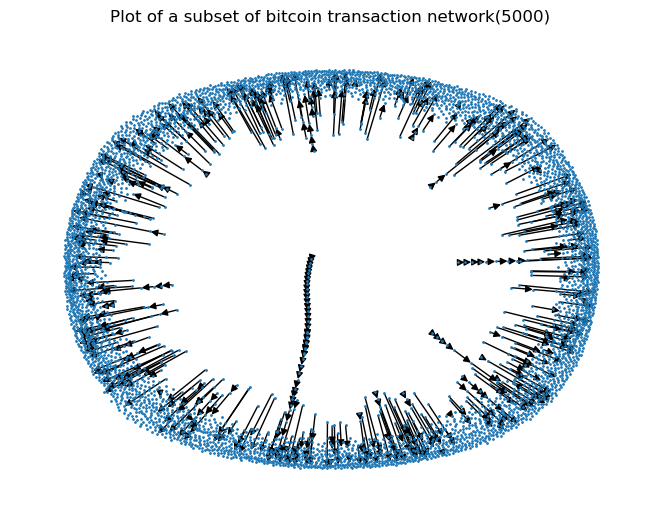

In [14]:
draw_subset_graph(G, nodes, nb_nodes=5000, title="Plot of a subset of bitcoin transaction network")

The shape of the graph below seems to confirm the above observations. Namely, the majority of transaction blocks are linked only to another transaction block. The vast majority of transaction blocks appear to have, on average, a single input and output. Visually, it's also clear that a large number of transaction blocks have only one input and no output.

#### Draw the interactions for a specific node transaction [Hugo contribution]

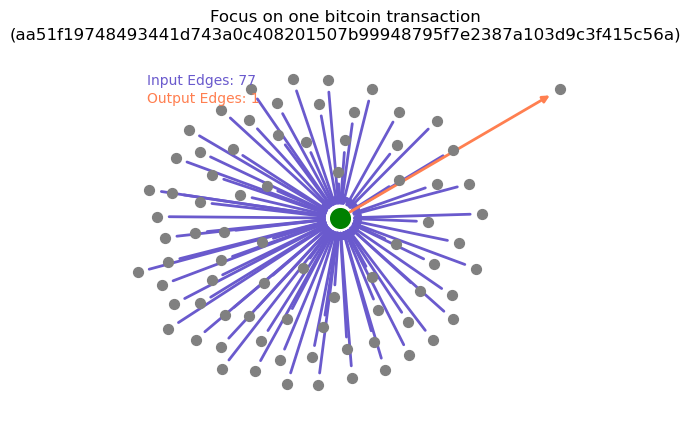

In [15]:
hash_node_transaction = "aa51f19748493441d743a0c408201507b99948795f7e2387a103d9c3f415c56a"
plot_graph_for_specific_node(G, hash_node_transaction)

We focus on one transaction in particular. The choice of this transaction is completely arbitrary and the code can be parameterized. Knowing the hash of the transaction in question, it is possible, thanks to the previous function, to trace all the interactions (input and output) of a block of transactions.

In the graph above, we're interested in the interactions of the transaction whose hash is `aa51f19748493441d743a0c408201507b99948795f7e2387a103d9c3f415c56a`. We can see that this transaction has many more inputs than outputs. This transaction has many more inputs than outputs. Also, this transaction block is connected to 78 other transaction blocks (77 transactions inputs and 1 transaction output).

## Let's now focus our analyze on the SEC ETF approval for bitcoin

The SEC's approval for the creation of Bitcoin Spot ETFs on US exchanges has important implications for the crypto sphere. It will offer a new way of investing in Bitcoin (BTC) for US investors, which could lead to increased demand and a higher Bitcoin price. Bitcoin Spot ETFs could also attract new investors, notably institutional investors. 

So the aim of our study is to investigate the impact of this announcement on Bitcoin transactions. 

To this end, we will analyze transactions that took place before and after the SEC's official announcement. 

The SEC announcement took place on 10-01-2024 at 10:30pm French time, i.e. 4:30pm Wahshington time. Given that the timestamp used by bitcoin is UTC. The SEC's decision took place at 09:30pm. 

Consequently, we will analyze the transactions that took place 2 hours before and after the SEC announcement. This will also enable us to work on lighter graphs (containing fewer nodes and vertices).

### Statistic plots of the network [Hugo contribution]

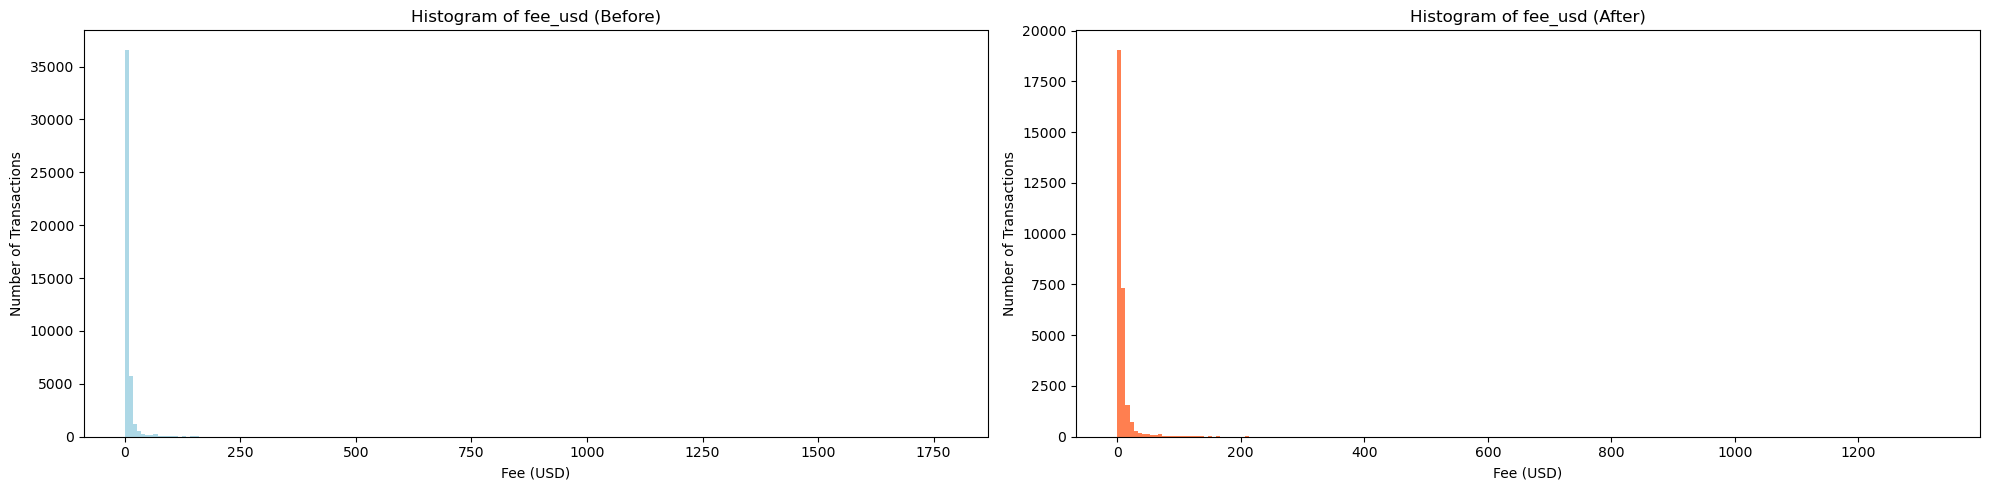

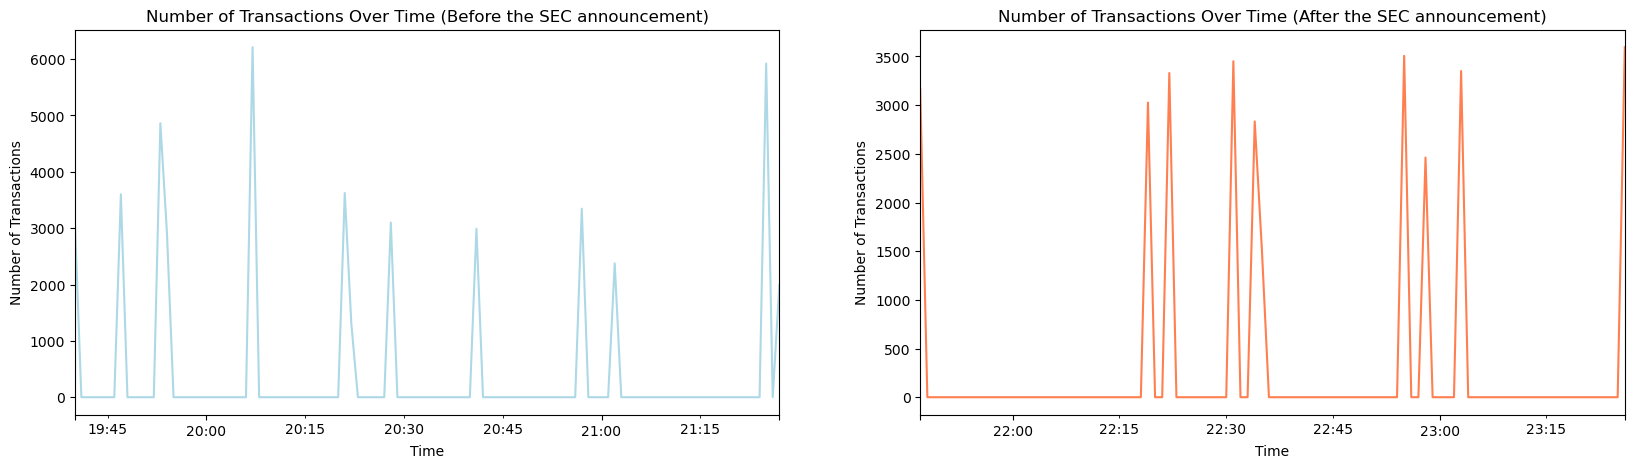

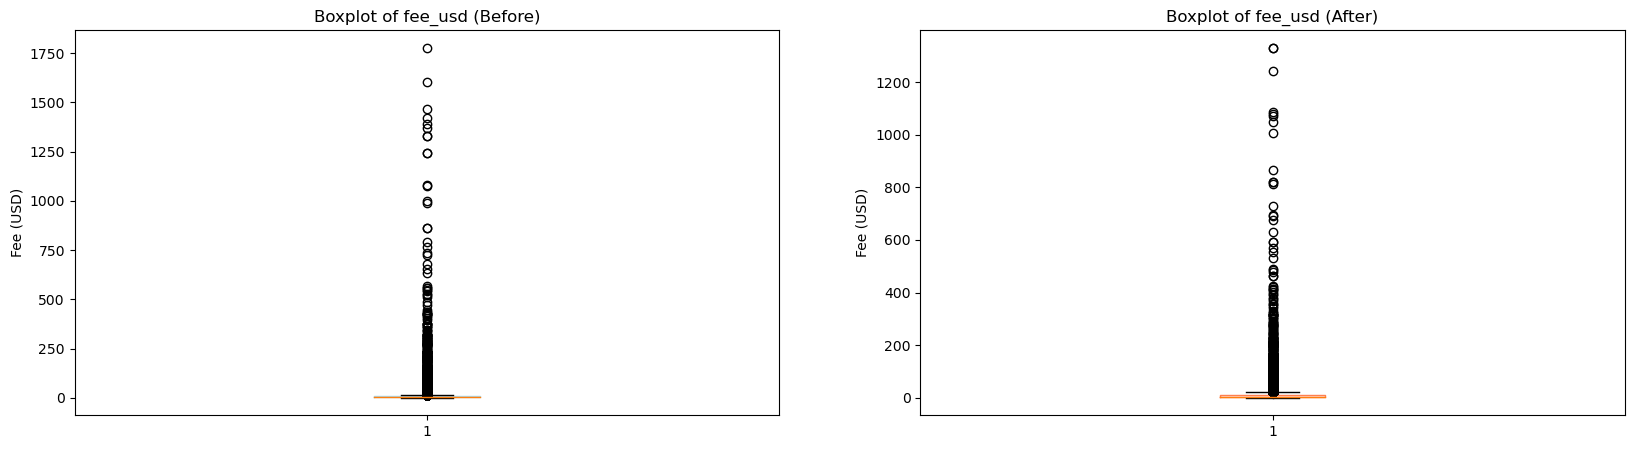

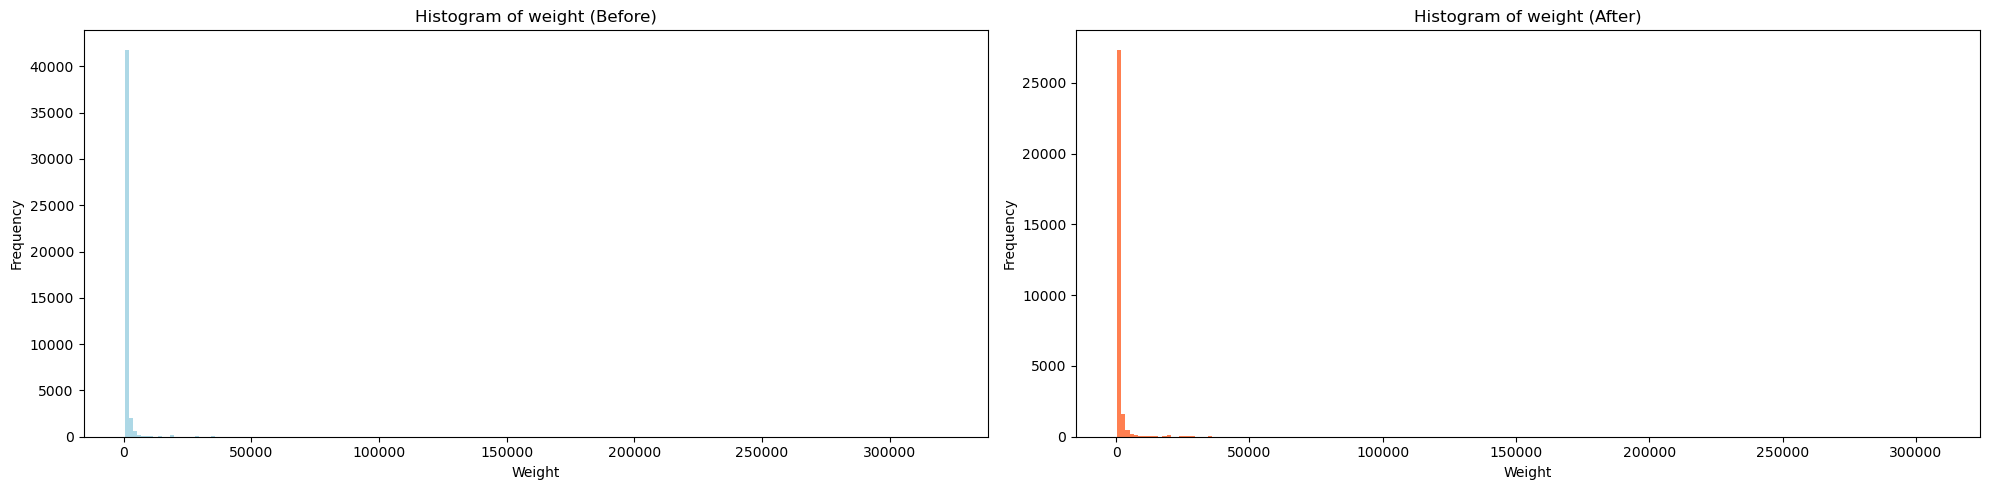

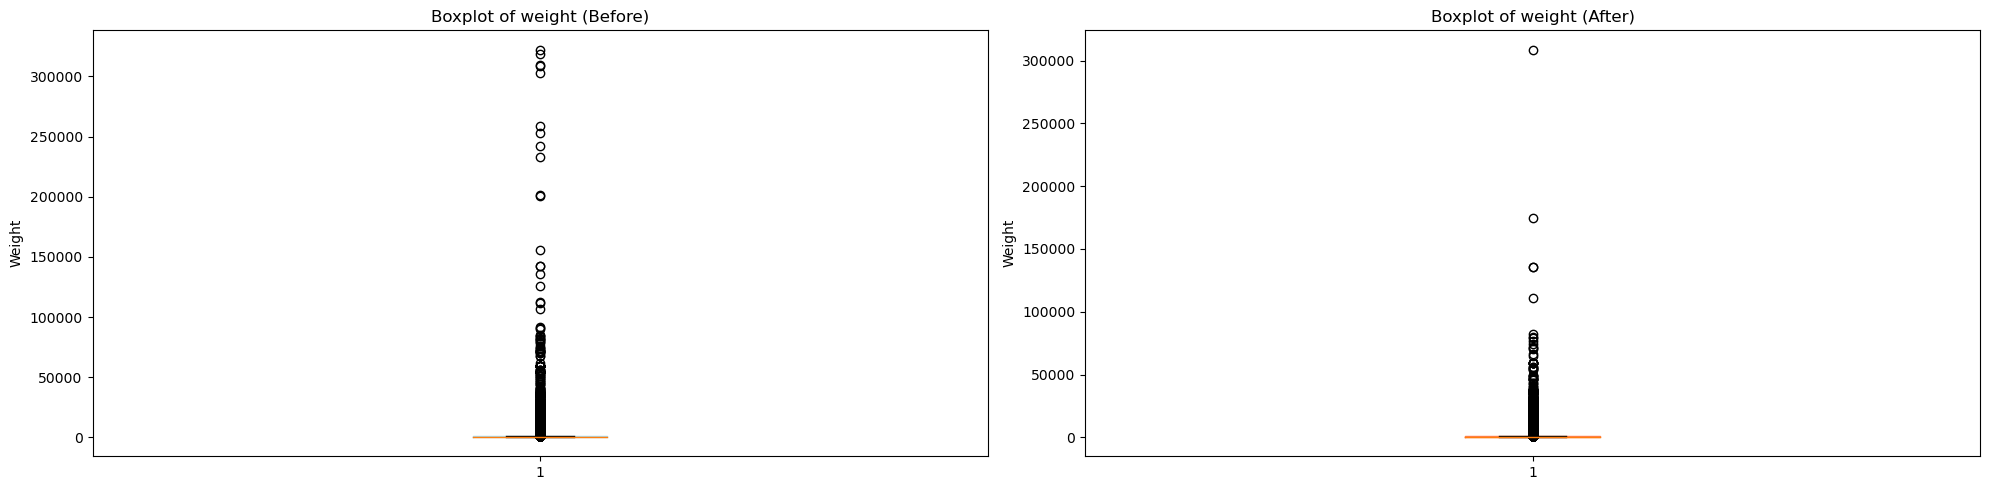

In [16]:
plot_statistics_bitcoin_transaction(nodes_df)

These graphs show that the SEC announcement on bitcoin ETFs does not seem to have had any impact on the number of bitcoin transactions. We might have expected the number of transactions to explode after the SEC's announcement, but that's not what we're seeing. In fact, the number of transactions decreased after the SEC announcement. Overall, we're seeing around 3,000-4,000 transactions every 15 minutes before the SEC decision. The same phenomenon is also visible after the SEC decision. We note, however, that the maximum number of transactions before the SEC decision is double the maximum number of transactions after the SEC decision.

Regardint to the amounts involved in mining transaction blocks, we can observe that the fees for mining bitcoin transactions are overwhelmingly in the 2-digit range (i.e. between 0 dollars and 50 dollars). However, there are some transactions for which the mining fee is in 3 digits. For example, the maximum amount was 1750 dollars  before the SEC announcement and around 1400 dollars after the SEC announcement. 

Finally, the weights associated with each bitcoin transaction block are mostly low. However, some transaction blocks stand out for their very high weights. We can imagine that these transactions are important nodes in our graph (large number of degrees). This suggests that certain nodes play the role of pivot nodes in our graph, due to the large number of neighbors. These nodes must have a large number of inputs and outputs.

### Lets build the two transaction bitcoin networks before and after the SEC decision

In [17]:
start_time = '2024-01-10 19:30:00'
sec_announcement_time = '2024-01-10 21:30:00'
end_time = '2024-01-10 23:30:00'

G_before, G_after = build_networks_SEC_announcement(G, start_time, sec_announcement_time, end_time)

In [18]:
print("#### Statistics before the SEC announcement ####\n")
compute_graph_statistics(G_before)
print("\n\n#### Statistics after the SEC announcement ####\n")
compute_graph_statistics(G_after)

#### Statistics before the SEC announcement ####

DiGraph with 45415 nodes and 6035 edges
Number of nodes 45415
Number of edges 6035
Average degree 0.26577122096223715
Density 2.9260935059919534e-06


#### Statistics after the SEC announcement ####

DiGraph with 30245 nodes and 5201 edges
Number of nodes 30245
Number of edges 5201
Average degree 0.3439246156389486
Density 5.685832159088557e-06


We can see that the statistics of the transaction graphs before and after the SEC decision on the use of bitcoin ETFs are very similar overall. However, the number of nodes in the graph after the SEC decision is lower than the graph before the SEC decision (-15,000 fewer nodes after the SEC decision). Consequently, the average number of neighbors is higher after the SEC decision.

### Find the most important bitoin transactions [Ondine contribution]

To do so, we identifying the nodes with the highest degrees

In [19]:
df_top_nodes_degrees_before, nodes_highest_degree_before = nodes_with_highest_degree(G_before, n_node=3000)
df_top_nodes_degrees_after, nodes_highest_degree_after = nodes_with_highest_degree(G_after, n_node=3000)

#### Plots the most `3000` important nodes (highest degrees)

##### _Before the SEC announcement_

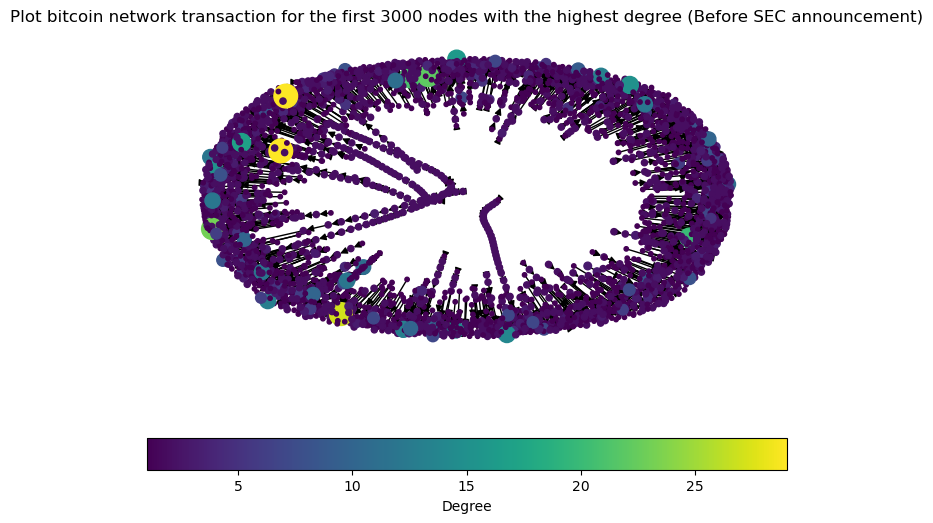

In [20]:
plot_node_with_highest_degrees(G_before, nodes_highest_degree_before, type_sec="(Before SEC announcement)")

##### _After the SEC announcement_

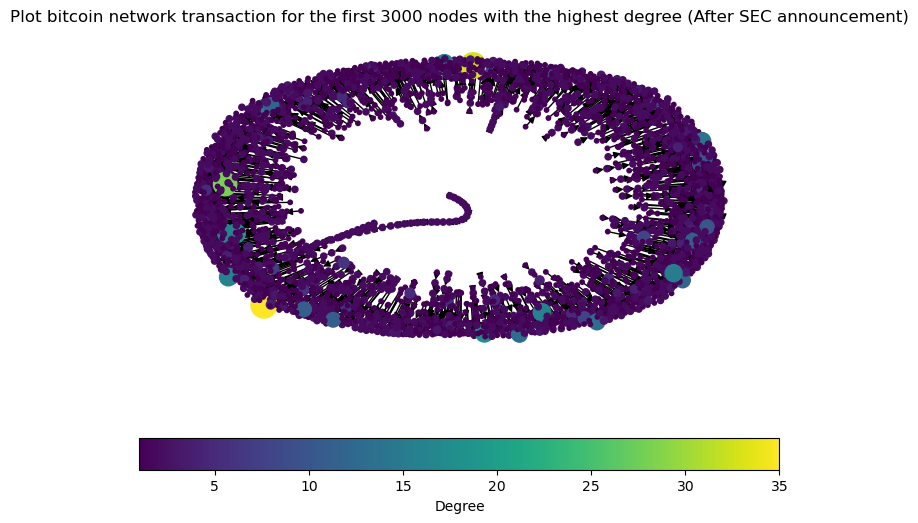

In [21]:
plot_node_with_highest_degrees(G_after, nodes_highest_degree_after, type_sec="(After SEC announcement)")

We note that the graph before the SEC decision has more nodes with a large number of degrees (yellow and green nodes) than the graph after the SEC decision. On the other hand, the graph after the SEC decision seems to have 2 very important nodes with more degrees (35 neighbors) than the most important nodes (25 neighbors) in the graph before the SEC decision.

Overall, the graphs confirm the statistics we calculated earlier, as they show very similar patterns. Consequently, the SEC's decision seems to have little impact on the dynamics of bitcoin transactions.

## Let's focus now on the `10` most important nodes (highest degrees)

For obvious reasons of computational resource, we decided to concentrate our analysis on the 10 transactions bicoin nodes with the highest degree.

In [22]:
# Select the first 10 nodes with the highest degrees after and before the SEC decision
df_G_top10_before, nodes10_highest_degree_before = nodes_with_highest_degree(G_before, n_node=10)
df_G_top10_after, nodes10_highest_degree_after = nodes_with_highest_degree(G_after, n_node=10)

top10_nodes_before = df_G_top10_before["hash_transaction"].tolist()
top10_nodes_after = df_G_top10_after["hash_transaction"].tolist()

# Build the subgraph of the 1000 nodes with highest degrees after and before the SEC decision
G_top10_before = build_subgraph_top_nodes(G_before, top10_nodes_before)
G_top10_after = build_subgraph_top_nodes(G_after, top10_nodes_after)

#### Compute basic statistic for both network (Before and after the SEC announcement) [Ondine Contributions]

In [23]:
print("#### Statistics before the SEC announcement ####\n")
compute_graph_statistics(G_top10_before)
print("\n\n#### Statistics after the SEC announcement ####\n")
compute_graph_statistics(G_top10_after)

#### Statistics before the SEC announcement ####

DiGraph with 229 nodes and 219 edges
Number of nodes 229
Number of edges 219
Average degree 1.9126637554585153
Density 0.004194438060216042


#### Statistics after the SEC announcement ####

DiGraph with 222 nodes and 212 edges
Number of nodes 222
Number of edges 212
Average degree 1.90990990990991
Density 0.004321063144592557


By focusing our analysis on the interactions of the 10 largest transactions that took place before and after the SEC ruling. We note that these transactions show similar patterns. Indeed, the descriptive statistics of the two graphs (before and after the SEC decision) are very close. For example, the average number of degrees is identical. Most nodes have 2 neighbors. This suggests that most nodes have a single input and a single output.

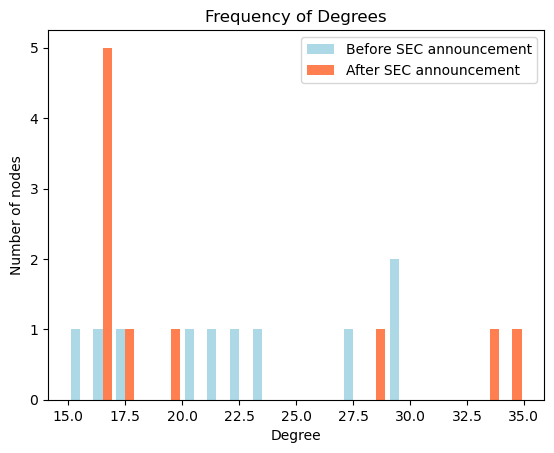

In [24]:
plot_distribution_degrees(df_G_top10_before["degrees"], df_G_top10_after["degrees"]);

This graph shows that the graph after the SEC decision has more nodes with higher degrees (over 30 nodes) than the graph before the SEC decision.

This highlights the fact that the graph after the SEC decision has 2-3 nodes playing a pivotal (very important) role.

### Plot the two network before and after the SEC announcement [Ondine Contribution]

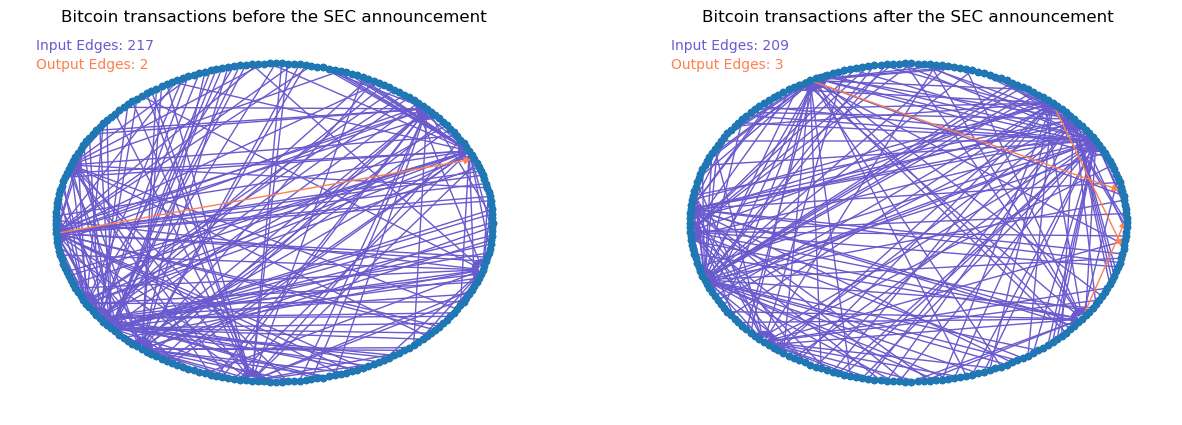

In [25]:
plot_graph_before_after(G_top10_before, G_top10_after, top10_nodes_before, top10_nodes_after)

#### Plot the betweeness centrality distribution before and after the SEC announcement [Ondine Contribution]

Betweenness centrality can be useful in identifying critical nodes in a network, such as key connectors or bottlenecks, and can provide insights into how information or influence spreads throughout the network.

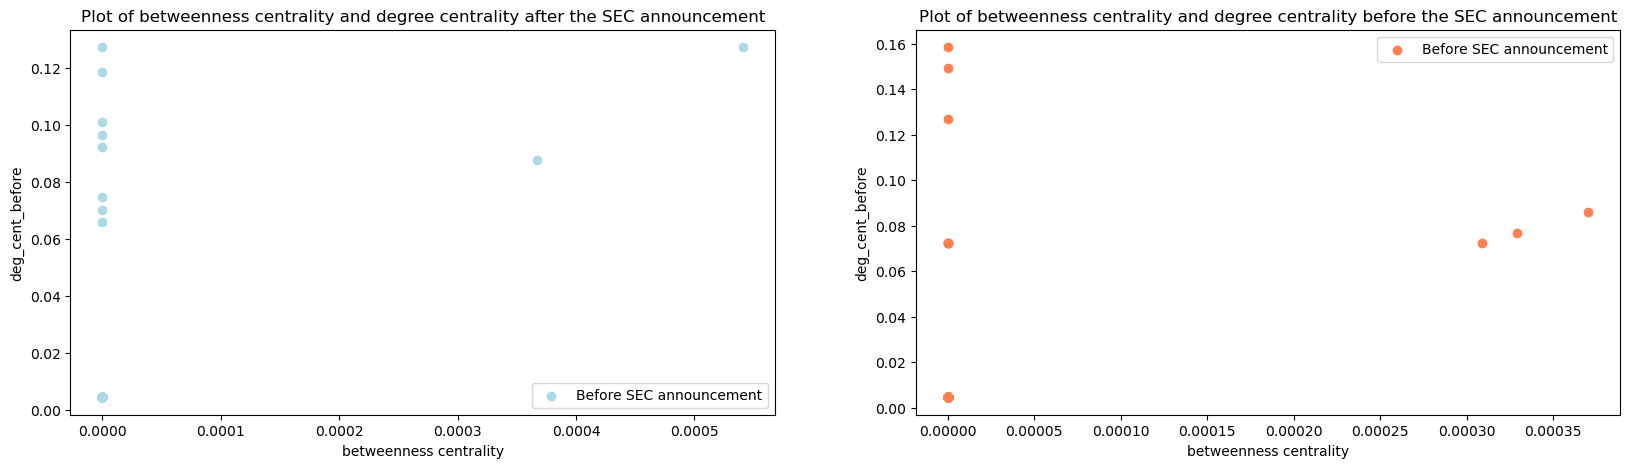

In [26]:
compute_betweenness_centrality(G_top10_before, G_top10_after)

We can see that de betweenness centrality of the both graph (before and after the SEC announcement) are very low. This means that no node in the graph acts as a bridge along the shortest path between pairs of other nodes in both networks. Hence, no nodes semmes to be crucial for maintaining communication and facilitating the flow of transaction between different parts of the network.

#### Compute degree distribution and degree centrality [Hugo contribution]

The degree centrality measures the number of direct connections a node has. Nodes with high degree centrality are highly connected to other nodes in the network and are often considered important for information dissemination.

$$
\frac{\text{Number of neighbours I have}}{\text{Number of neighbours I could possibly have}}
$$

Degree Centrality of a node can range from 0 (if the node has no connections) to 1 (if the node is connected to every other node in the network)

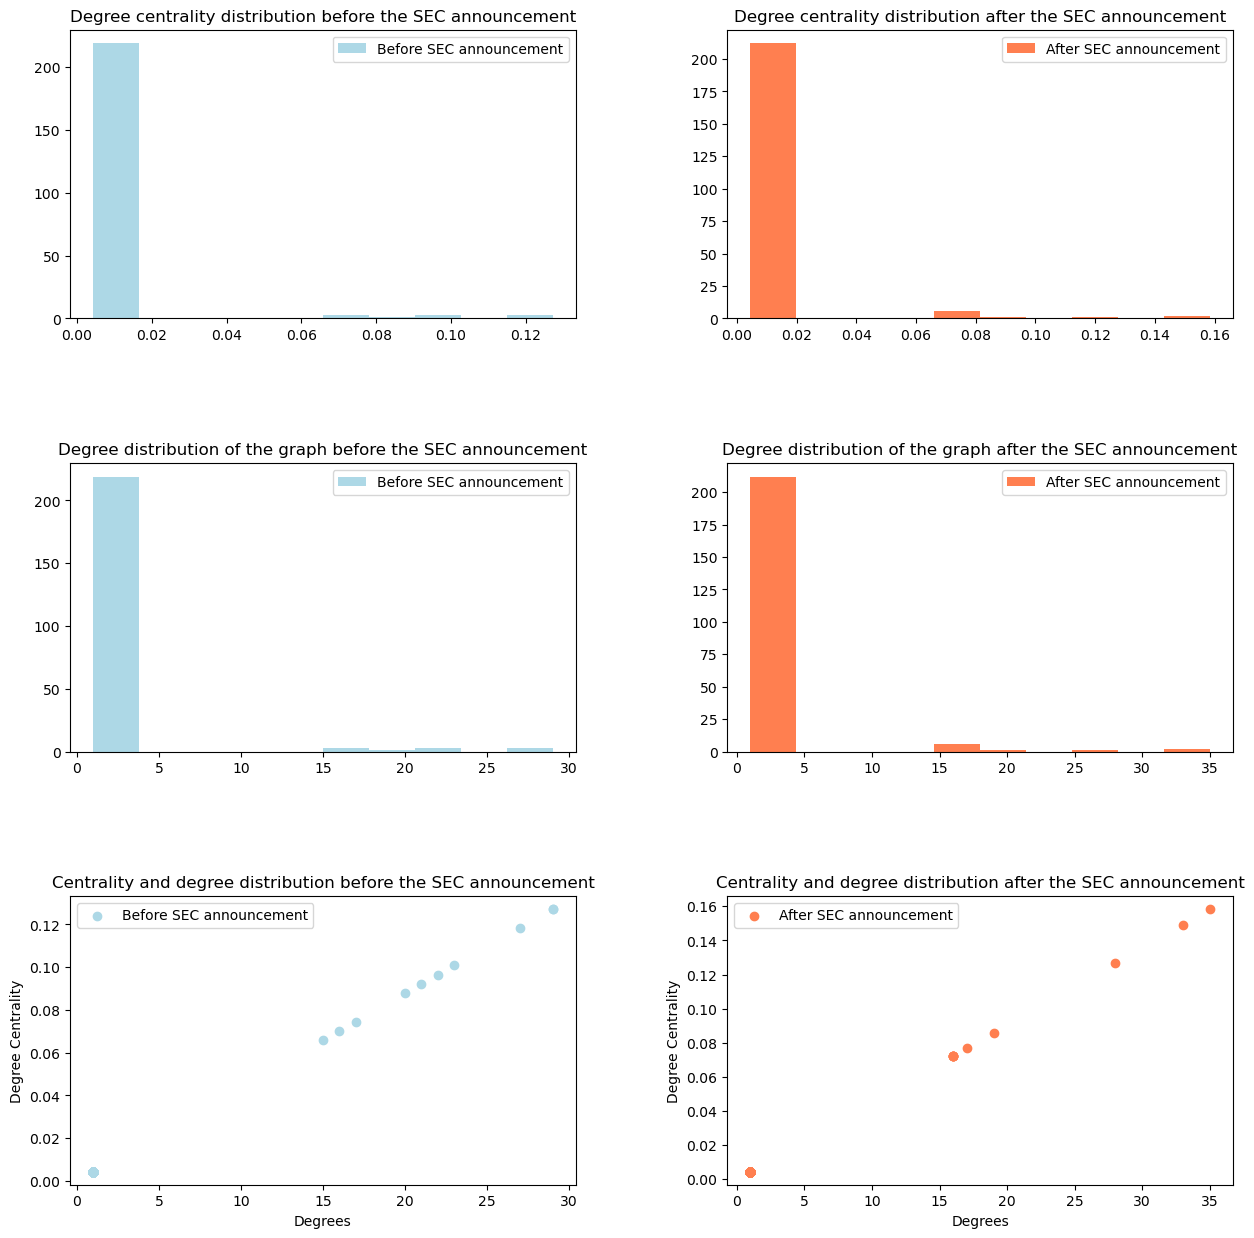

In [27]:
compute_degree_distribution(G_top10_before, G_top10_after)

We can note that the distributions of the number of degrees and the distribution of degree centrality are very similar for both network (before and after the SEC announcement). In addition, we can see that the higher the number of degrees, the higher the degree of centrality.

### Plot the transactions with the highest input total in dollars ($) [Hugo contribution]

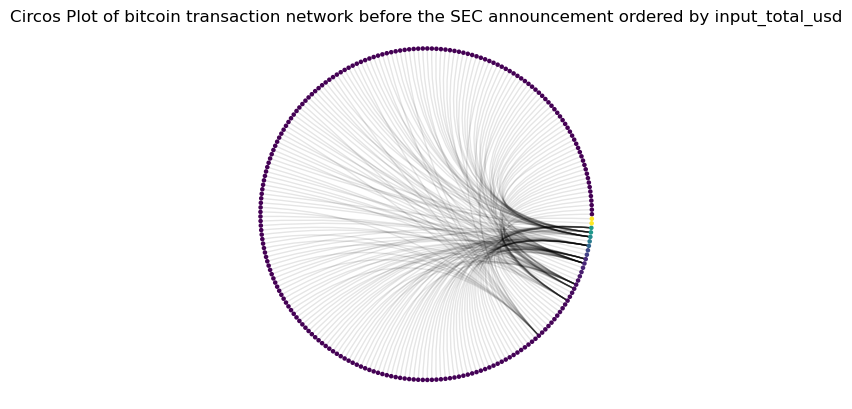

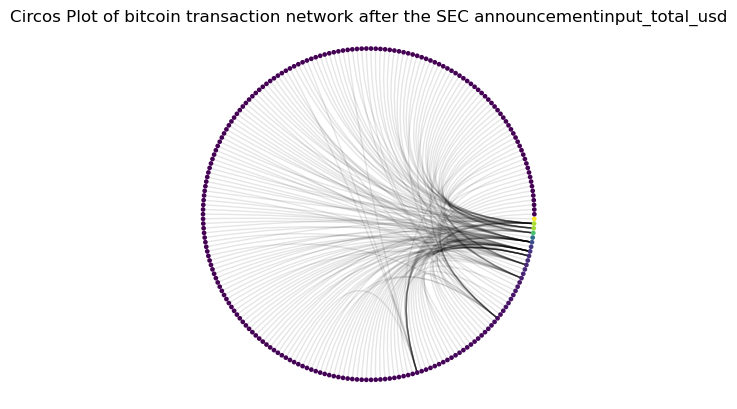

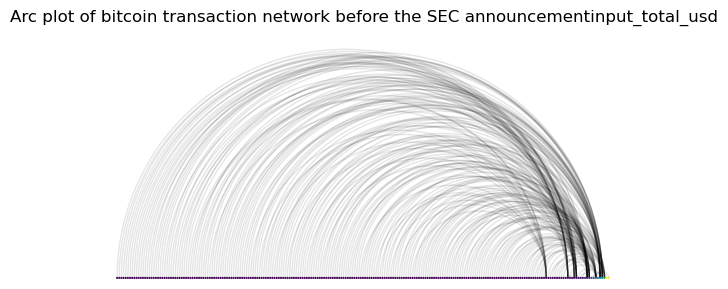

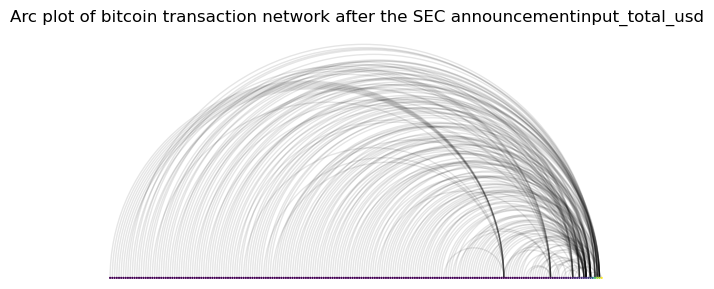

In [28]:
circo_plot_graph(G_top10_before, G_top10_after, node_order='input_total_usd', node_color='input_total_usd')
arc_plot_graph(G_top10_before, G_top10_after, node_order='input_total_usd', node_color='input_total_usd')

#### Plot the transactions with the highest amount in dollars ($) [Hugo contribution]

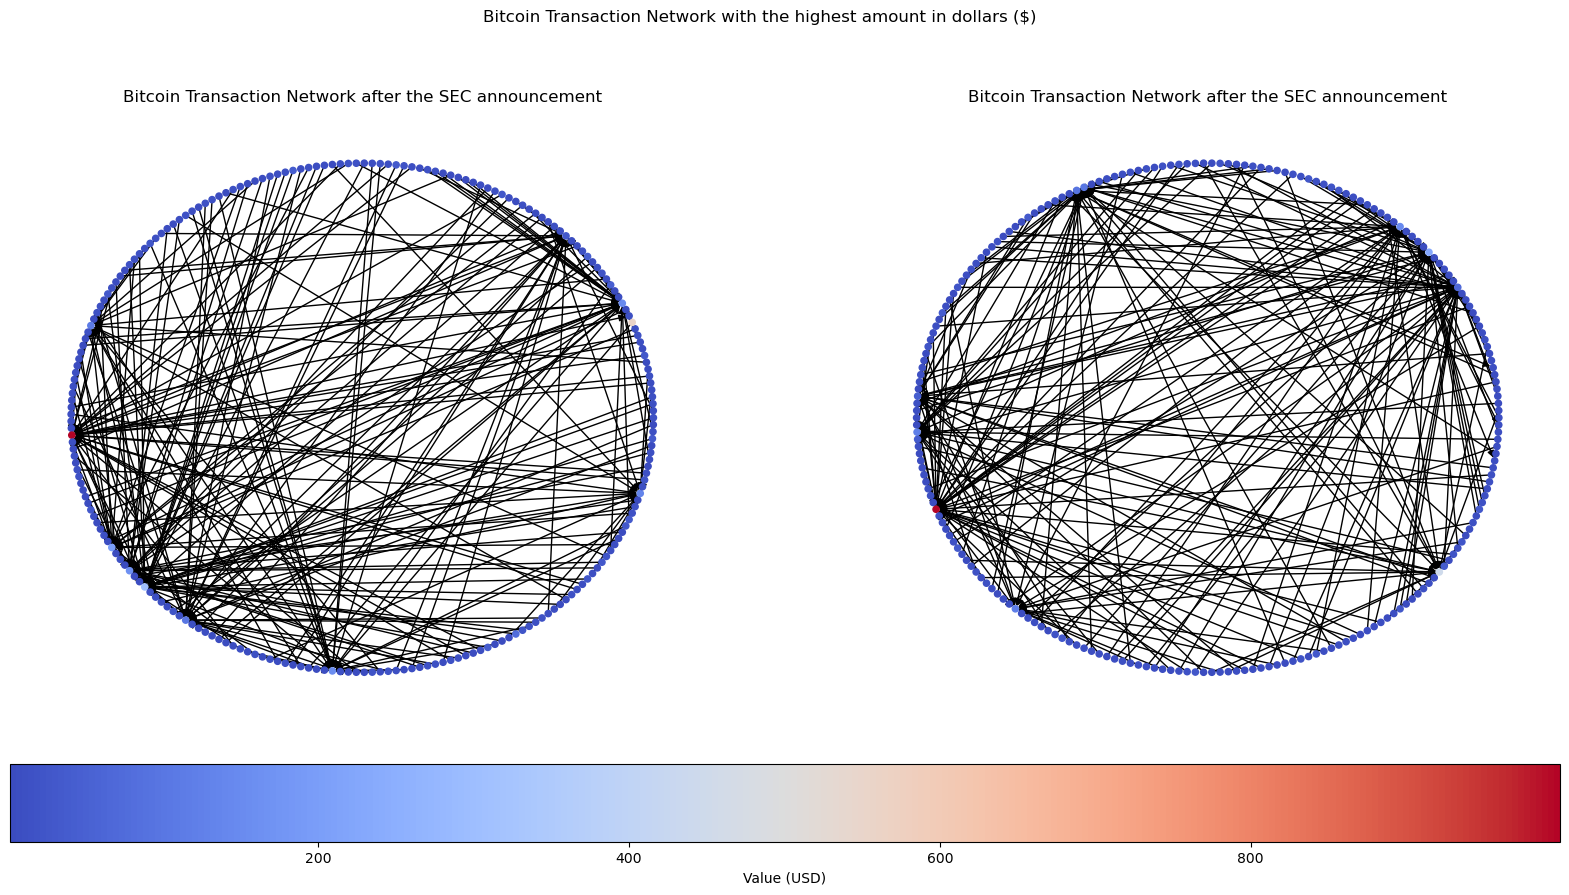

In [29]:
transaction_fees_amount(G_top10_before, G_top10_after)

#### Plot bitcoin transaction graphs with node size based on the number of neighbors (degrees) and node color based on the dollar amount of the input. [Hugo contribution]

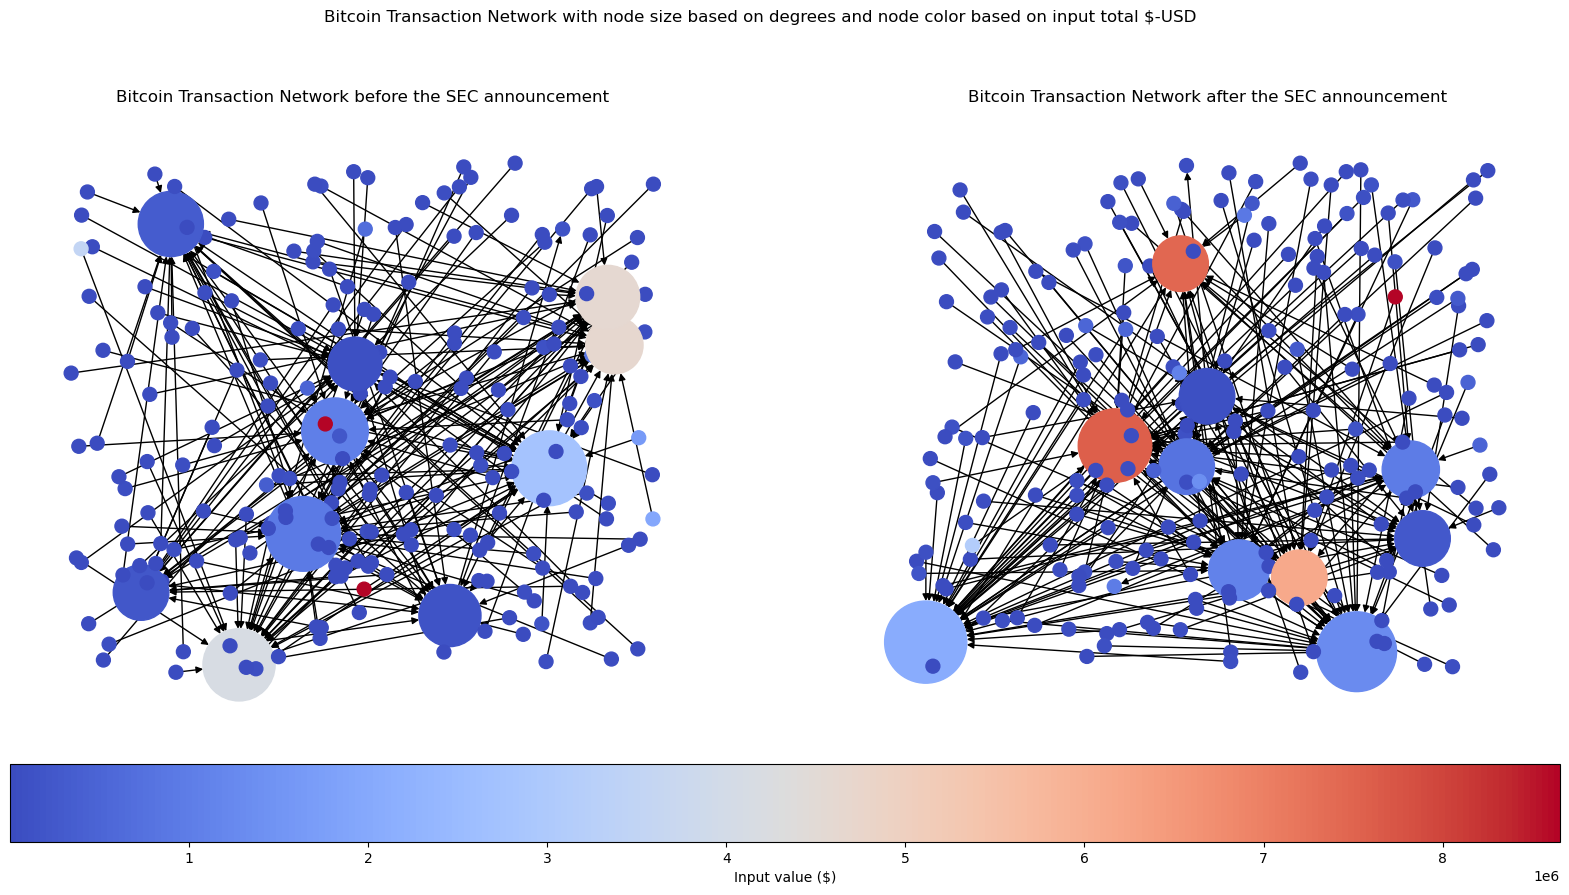

In [30]:
plot_transaction_graph_bis(G_top10_before, G_top10_after)

### Plot Bitcoin Transaction Network with node size based on degrees and node color based on input total USD and edges size based on the value USD transaction [Hugo contribution]

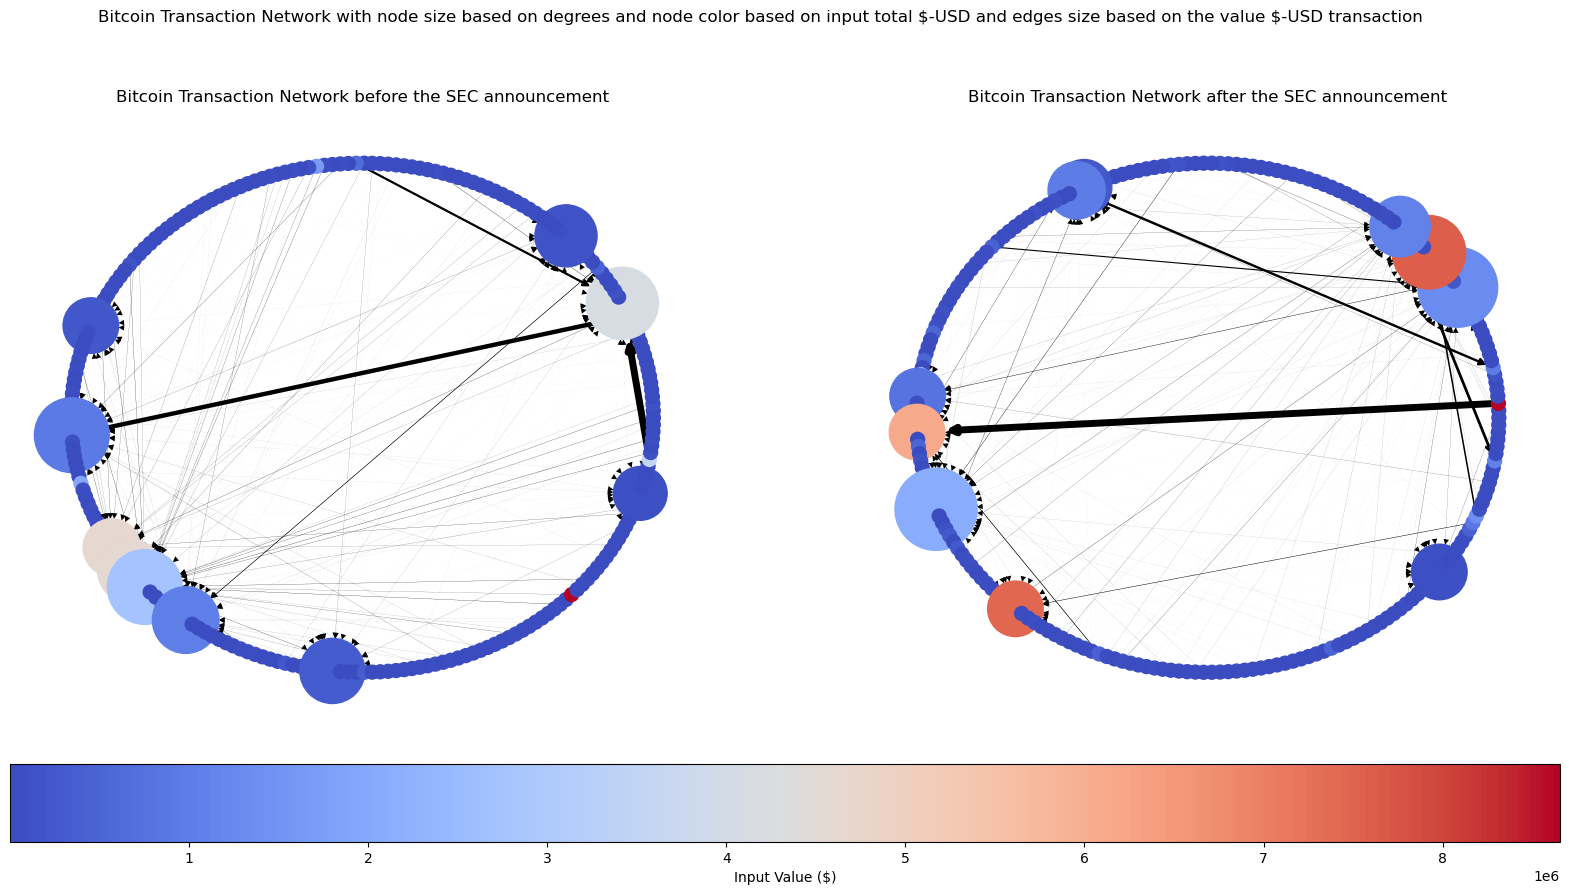

In [31]:
plot_transaction_bitcoin_network(G, G_top10_before, G_top10_after)

#### Plot betweeness centrality of the bitcoin transactions network [Hugo contribution]

Betweenness is a measure of centrality based on shortest paths. The betweenness centrality for each node is the number of these shortest paths that pass through the node.

**_Before the SEC announcement_**

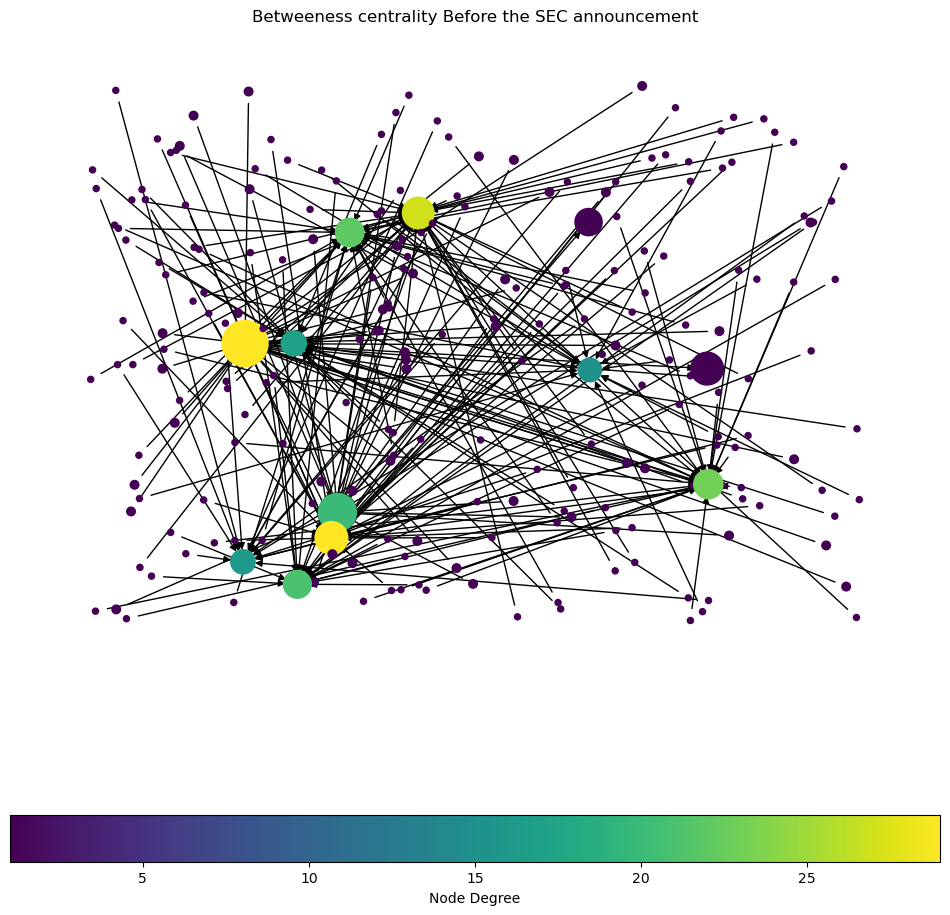

In [32]:
plot_betweenness_centrality_network(G_top10_before, type_sec="Before the SEC announcement")

**_After the SEC announcement_**

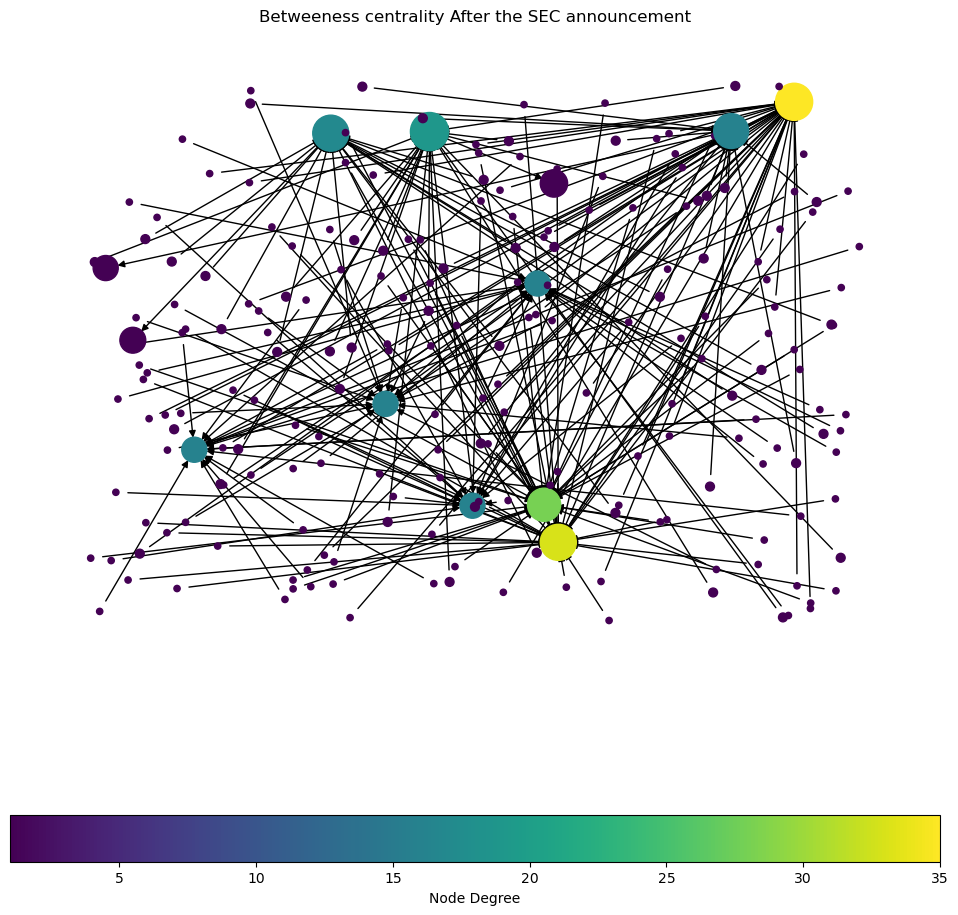

In [33]:
plot_betweenness_centrality_network(G_top10_after, type_sec="After the SEC announcement")

### Page Rank [Hugo contribution]

PageRank is an algorithm used by Google Search to rank web pages in their search engine results. It is a way of measuring the importance of website pages. For example, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is.

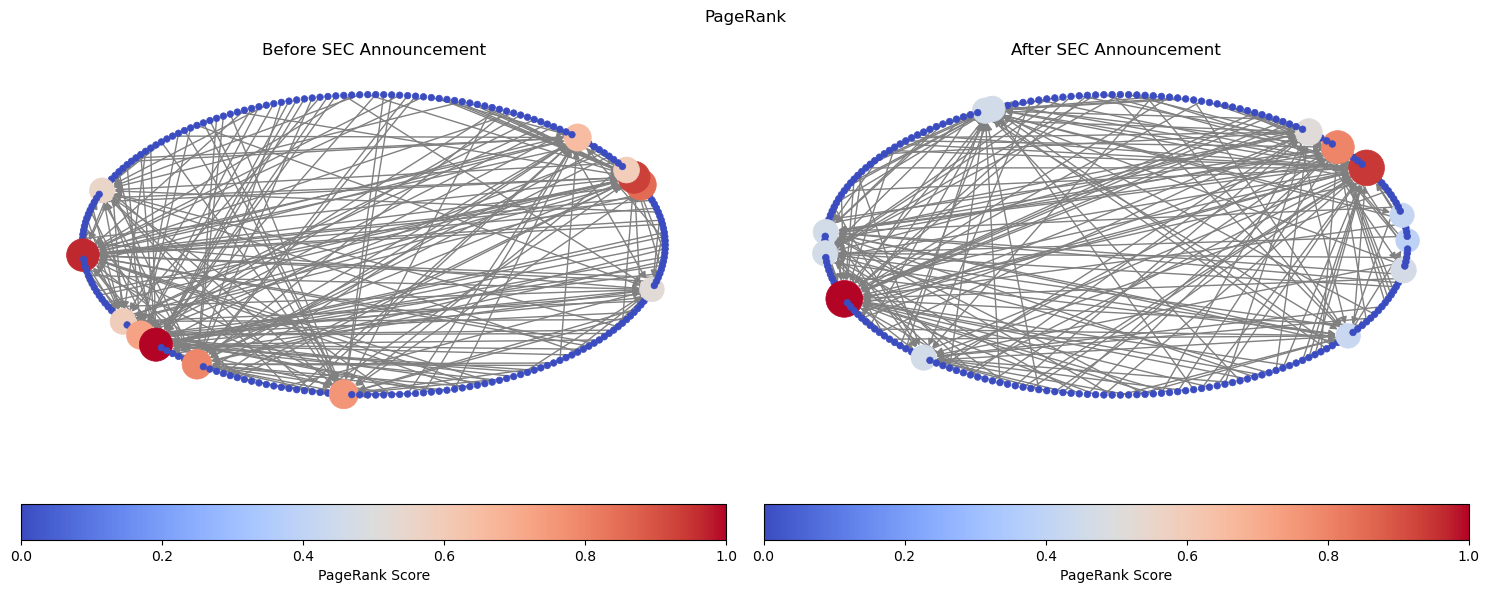

In [34]:
def apply_pagerank_and_plot_side_by_side(G_before, G_after):
    # Apply PageRank algorithm for both networks
    pagerank_scores_before = nx.pagerank(G_before)
    pagerank_scores_after = nx.pagerank(G_after)

    # Plotting the graphs side by side
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot for Before SEC Announcement network
    pos_before = nx.circular_layout(G_before)
    node_sizes_before = [v * 1e4 for v in pagerank_scores_before.values()]  # Adjust multiplier as needed
    node_color_before = list(pagerank_scores_before.values())
    node_colorbar_before = axs[0].scatter([], [], c=[], cmap='coolwarm', edgecolor='none')
    nx.draw(G_before, pos_before, ax=axs[0], with_labels=False, node_color=node_color_before, cmap='coolwarm', edge_color='gray', linewidths=0.5, font_size=8, node_size=node_sizes_before)
    axs[0].set_title("Before SEC Announcement")
    
    # Plot for After SEC Announcement network
    pos_after = nx.circular_layout(G_after)
    node_sizes_after = [v * 1e4 for v in pagerank_scores_after.values()]  # Adjust multiplier as needed
    node_color_after = list(pagerank_scores_after.values())
    node_colorbar_after = axs[1].scatter([], [], c=[], cmap='coolwarm', edgecolor='none')
    nx.draw(G_after, pos_after, ax=axs[1], with_labels=False, node_color=node_color_after, cmap='coolwarm', edge_color='gray', linewidths=0.5, font_size=8, node_size=node_sizes_after)
    axs[1].set_title("After SEC Announcement")
    
    # Add color bar
    cbar_before = fig.colorbar(node_colorbar_before, ax=axs[0], orientation='horizontal', label='PageRank Score')
    cbar_after = fig.colorbar(node_colorbar_after, ax=axs[1], orientation='horizontal', label='PageRank Score')
    
    plt.suptitle("PageRank")
    
    plt.tight_layout()
    plt.show()

# Call the function with the network graphs
apply_pagerank_and_plot_side_by_side(G_top10_before, G_top10_after)

## Conclusion

In comparing the state of the Bitcoin transaction network before and after the SEC's announcement of a Bitcoin ETF, several key insights emerge.

Firstly, the reduction in the number of nodes post-announcement suggests that while there may have been an anticipation or speculation leading to increased activity before the announcement, the actual event led to a consolidation rather than an expansion in transaction activity. Despite the lower number of nodes, the increase in average degree and density indicates that the transactions that did occur were more interconnected, possibly reflecting a more cautious or strategic approach by those transacting in Bitcoin immediately after the announcement.

Interestingly, the descriptive statistics, such as average degree and density, are relatively close before and after the announcement, suggesting that the overall structure and connectivity of the network remained stable. This stability points to the underlying robustness of the Bitcoin network and indicates that major news events may not have as dramatic an immediate impact as might be expected.

The circos and arc plots depicting the top transactions by total input in USD before and after the announcement demonstrate the concentration of transaction volume among a few significant nodes. These focal nodes could represent large institutional moves or aggregations of smaller transactions by intermediaries.

Finally, betweenness centrality metrics suggest that the network does not rely on a few nodes to facilitate transaction flows. A low betweenness centrality across the network indicates a distributed interconnectivity that does not bottleneck at particular nodes. This further underpins the decentralized nature of the Bitcoin transaction network.

Overall, the SEC's announcement appears to have had a more nuanced effect on the Bitcoin network than might be presumed. Instead of a surge in transaction activity, there seems to be a strategic shift in the way transactions are conducted, with the most significant transactions playing a pivotal role. These insights highlight the complex and multifaceted response of decentralized networks to regulatory and external stimuli.